In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
file_path = "nominal.csv"

data = np.loadtxt(file_path, delimiter=",")
#data += np.loadtxt("x_8mm.csv", delimiter=",")

In [31]:
data

array([[2.72, 2.57, 2.71, ..., 2.58, 2.47, 2.43],
       [2.77, 2.57, 2.55, ..., 2.76, 2.64, 2.68],
       [2.77, 2.62, 2.56, ..., 2.7 , 2.67, 2.62],
       ...,
       [2.82, 2.71, 2.51, ..., 2.8 , 2.63, 2.65],
       [2.73, 2.49, 2.48, ..., 2.55, 2.61, 2.66],
       [2.67, 2.71, 2.38, ..., 2.4 , 2.64, 2.63]])

In [43]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_pyplot_note',
 '_api',
 '_auto_draw_if_interactive',
 '_

In [46]:
help(plt.locator_params)

Help on function locator_params in module matplotlib.pyplot:

locator_params(axis: "Literal['both', 'x', 'y']" = 'both', tight: 'bool | None' = None, **kwargs) -> 'None'
    Control behavior of major tick locators.

    Because the locator is involved in autoscaling, `~.Axes.autoscale_view`
    is called automatically after the parameters are changed.

    Parameters
    ----------
    axis : {'both', 'x', 'y'}, default: 'both'
        The axis on which to operate.  (For 3D Axes, *axis* can also be
        set to 'z', and 'both' refers to all three axes.)
    tight : bool or None, optional
        Parameter passed to `~.Axes.autoscale_view`.
        Default is None, for no change.

    Other Parameters
    ----------------
    **kwargs
        Remaining keyword arguments are passed to directly to the
        ``set_params()`` method of the locator. Supported keywords depend
        on the type of the locator. See for example
        `~.ticker.MaxNLocator.set_params` for the `.ticker.Max

In [48]:
from matplotlib.widgets import Cursor

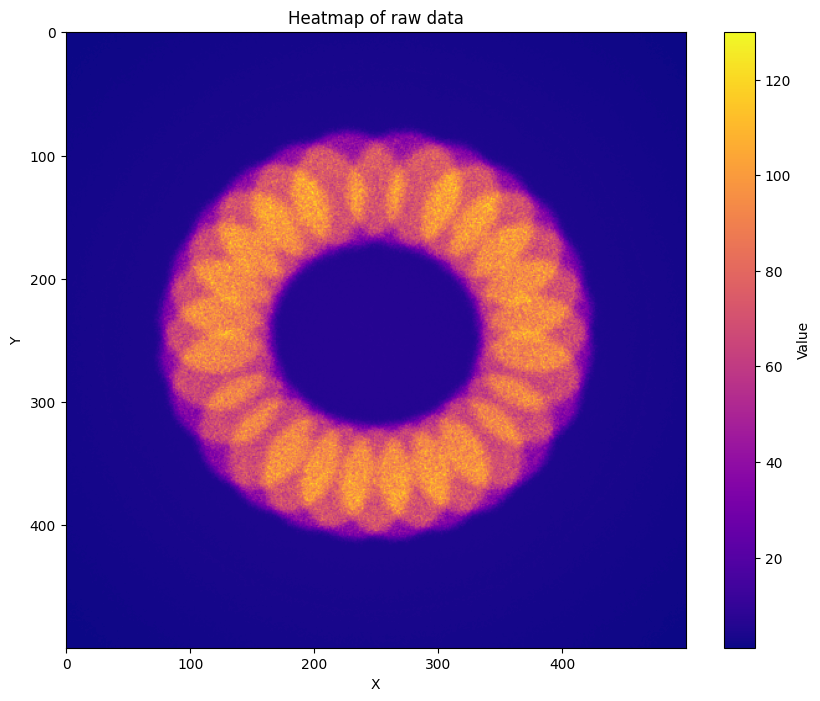

In [57]:


plt.figure(figsize=(10, 8))
plt.imshow(data, aspect='auto', cmap='plasma')  # Choose your preferred colormap
plt.colorbar(label='Value')  # Add a color bar
plt.title("Heatmap of raw data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [34]:
photodetector_locations = np.array([
    (0, 15),
    (1.756, 8.827),
    (3.512, 17.654),
    (5.74, 13.858),
    (7.483, 5),
    (10.607, 10.607),
    (14.966, 10),
    (13.858, 5.74),
    (15, 0),
    (8.827, -1.756),
    (17.654, -3.512),
    (13.858, -5.740),
    (5, -7.483),
    (10.607, -10.607),
    (10, -14.966),
    (5.74, -13.858),
    (0, -15),
    (-1.756, -8.827),
    (-3.512, -17.654),
    (-5.74, -13.858),
    (-7.483, -5),
    (-10.607, -10.607),
    (-14.966, -10),
    (-13.858, -5.74),
    (-15, 0),
    (-8.827, 1.756),
    (-17.654, 3.512),
    (-13.858, 5.740),
    (-5, 7.483),
    (-10.607, 10.607),
    (-10, 14.966),
    (-5.74, 13.858)
])


detector_size = 40

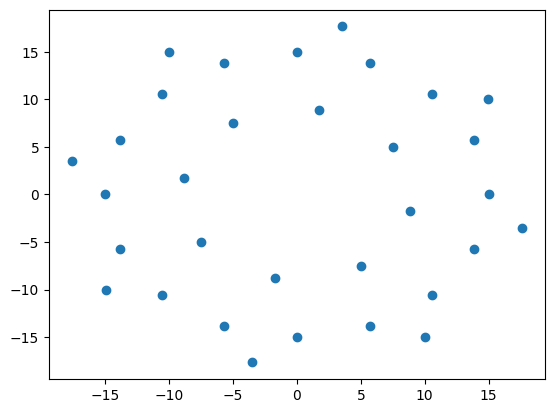

In [35]:
plt.scatter(photodetector_locations[:,0],photodetector_locations[:,1])

In [58]:
## Initialise the offsets
detector_offset = np.array([0,0])
centered_offset =  np.array([250,250]) ## this is the offset of the ring
photodetector_loc_new = (((photodetector_locations + photodetector_locations.max())/(photodetector_locations.max()*2)) * 350).round() + centered_offset +detector_offset
photodetector_loc_new

array([[425., 574.],
       [442., 512.],
       [460., 600.],
       [482., 562.],
       [499., 475.],
       [530., 530.],
       [573., 524.],
       [562., 482.],
       [574., 425.],
       [512., 408.],
       [600., 390.],
       [562., 368.],
       [475., 351.],
       [530., 320.],
       [524., 277.],
       [482., 288.],
       [425., 276.],
       [408., 338.],
       [390., 250.],
       [368., 288.],
       [351., 375.],
       [320., 320.],
       [277., 326.],
       [288., 368.],
       [276., 425.],
       [338., 442.],
       [250., 460.],
       [288., 482.],
       [375., 499.],
       [320., 530.],
       [326., 573.],
       [368., 562.]])

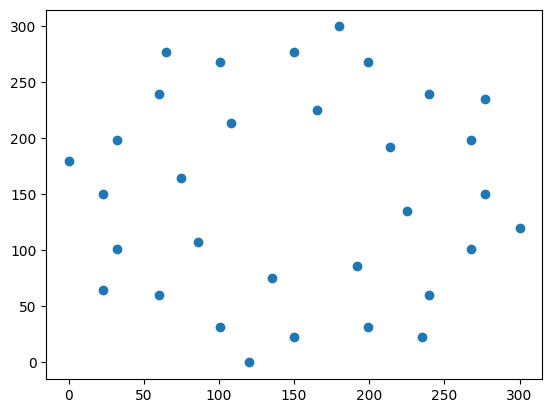

In [37]:
plt.scatter(photodetector_loc_new[:,0],photodetector_loc_new[:,1])

In [19]:
detectors_readings = []
for sample in photodetector_loc_new:
    reading = data[int(sample[0]),int(sample[1])]
    detectors_readings.append(reading)


In [20]:
# Convert detectors_readings to a NumPy array
detectors_readings = np.array(detectors_readings)

# Combine photodetector_loc_new and detectors_readings
visualise_reading = np.hstack((photodetector_loc_new, detectors_readings.reshape(-1, 1)))
detectors_readings


array([1.04e-05, 5.40e-06, 1.54e-05, 1.58e-05, 8.88e-06, 2.35e-05,
       3.28e-05, 1.89e-05, 5.22e-06, 4.74e-06, 1.42e-05, 1.34e-05,
       9.35e-06, 2.29e-05, 2.92e-05, 1.45e-05, 7.85e-06, 5.63e-06,
       1.57e-05, 1.63e-05, 8.30e-06, 1.94e-05, 2.88e-05, 1.49e-05,
       7.18e-06, 5.72e-06, 1.53e-05, 1.56e-05, 9.41e-06, 1.71e-05,
       2.92e-05, 1.48e-05])

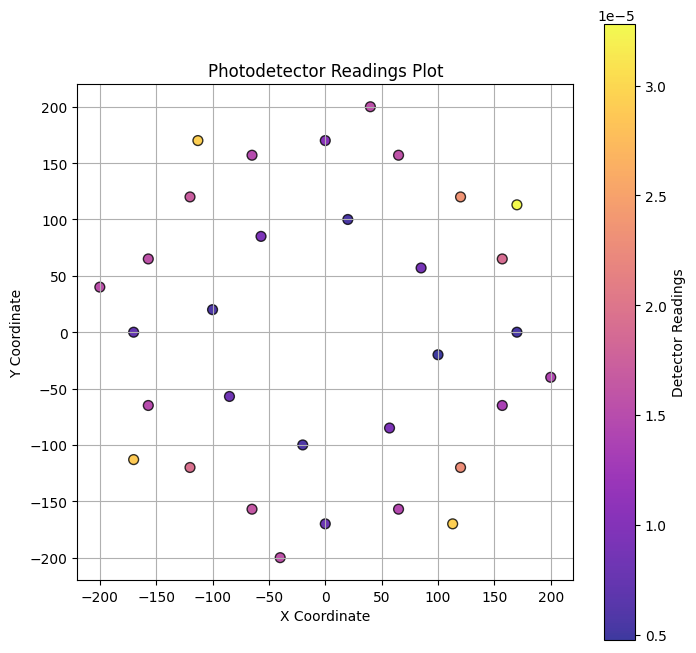

In [21]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    photodetector_loc_new[:, 0],  # X-coordinates
    photodetector_loc_new[:, 1],  # Y-coordinates
    c=detectors_readings,         # Color based on readings
    cmap='plasma',               # Colormap
    s=50,                         # Marker size
    edgecolor='k',                # Marker edge color
    alpha=0.8                     # Transparency
)

# Add a colorbar
plt.colorbar(scatter, label='Detector Readings')

# Label axes and title
plt.title("Photodetector Readings Plot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Equal scaling for X and Y axes

# Show plot
plt.show()

In [130]:
import random

In [135]:
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [ ]:
trainset_in = []
trainset_out = []
testset = []

for i in range(200):
    detector_offset[0] = random.randint(50,299)
    detector_offset[1] = random.randint(50,299)
    detector_dats_arr = []
    for sample in photodetector_loc_new + detector_offset:
        reading = data[int(sample[0]),int(sample[1])]
        detector_dats_arr.append(reading)
    trainset_in.append(detector_dats_arr)
    trainset_out.append([detector_offset[0],detector_offset[1]])

In [161]:
trainset_in

[[np.float64(3.08e-05),
  np.float64(4.41e-05),
  np.float64(2.3e-05),
  np.float64(4.13e-05),
  np.float64(0.00108),
  np.float64(4.33e-05),
  np.float64(4.17e-05),
  np.float64(0.000665),
  np.float64(0.000887),
  np.float64(0.000345),
  np.float64(0.000897),
  np.float64(6.66e-05),
  np.float64(7.15e-05),
  np.float64(6.93e-05),
  np.float64(7.13e-05),
  np.float64(7.05e-05),
  np.float64(0.00117),
  np.float64(0.000952),
  np.float64(0.000913),
  np.float64(0.000425),
  np.float64(4.92e-05),
  np.float64(4.22e-05),
  np.float64(3e-05),
  np.float64(4.1e-05),
  np.float64(2.71e-05),
  np.float64(4.08e-05),
  np.float64(2.36e-05),
  np.float64(2.89e-05),
  np.float64(4e-05),
  np.float64(3.05e-05),
  np.float64(2.29e-05),
  np.float64(2.89e-05)],
 [np.float64(2.11e-05),
  np.float64(2.75e-05),
  np.float64(1.44e-05),
  np.float64(1.84e-05),
  np.float64(3.04e-05),
  np.float64(2.19e-05),
  np.float64(1.65e-05),
  np.float64(2.41e-05),
  np.float64(3.2e-05),
  np.float64(4.2e-05),
  n

In [162]:
trainset_in = np.array(trainset_in)
trainset_out = np.array(trainset_out)

In [163]:
trainset_out

array([[ 94, 207],
       [152, 255],
       [ 94, 171],
       [ 64,  98],
       [ 50,  67],
       [292, 152],
       [138, 131],
       [239, 239],
       [220, 285],
       [113, 259],
       [172,  59],
       [ 54,  54],
       [167, 232],
       [273,  70],
       [251, 225],
       [229,  68],
       [ 86, 288],
       [277,  77],
       [137, 195],
       [176, 174],
       [298, 275],
       [231, 122],
       [165, 204],
       [122,  91],
       [229, 136],
       [ 71, 142],
       [ 51, 128],
       [221,  60],
       [ 68, 160],
       [232, 234],
       [187,  98],
       [204, 267],
       [254, 223],
       [269, 207],
       [ 81, 261],
       [182, 170],
       [213, 143],
       [128, 135],
       [219,  94],
       [137, 280],
       [145,  56],
       [120, 168],
       [ 79, 285],
       [218, 162],
       [135, 227],
       [168, 287],
       [143, 154],
       [175, 118],
       [ 85, 109],
       [ 77, 186],
       [ 70, 119],
       [262, 151],
       [ 77,

In [ ]:
import 

In [ ]:
train_dataset = torch.utils.data.TensorDataset(full_input,full_target)
train_loader  = torch.utils.data.DataLoader(train_dataset,
                                 batch_size=train_dataset.__len__())